In [6]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    "postgresql://robot-startml-ro:pheiph0hahj1Vaif@"
    "postgres.lab.karpov.courses:6432/startml"
)

In [7]:
import pickle
with open('user_df.pkl', 'rb') as f:
    user_df = pickle.load(f)

with open('posts_feautures.pkl', 'rb') as f:
    post_df = pickle.load(f)
    
with open('feed_data.pkl', 'rb') as f:
    feed_df = pickle.load(f)

In [8]:
user_df.columns

Index(['user_id', 'country', 'gender', 'age', 'city', 'exp_group'], dtype='object')

In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163205 entries, 0 to 163204
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    163205 non-null  int64 
 1   country    163205 non-null  object
 2   gender     163205 non-null  int64 
 3   age        163205 non-null  int64 
 4   city       163205 non-null  object
 5   exp_group  163205 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 8.7+ MB


In [4]:
df_memory = user_df.memory_usage(deep=True).sum()

print(f"Общий объем датафрейма: {df_memory / (1024**2):.2f} МБ")

Общий объем датафрейма: 26.47 МБ


In [5]:
df_memory = post_df.memory_usage(deep=True).sum()

print(f"Общий объем датафрейма: {df_memory / (1024**2):.2f} МБ")

Общий объем датафрейма: 10.88 МБ


In [13]:
user_df.shape, feed_df.shape, post_df.shape

((163205, 6), (893553, 5), (7023, 24))

In [14]:
df = feed_df.merge(post_df, on='post_id')

In [15]:
df = df.merge(user_df, on='user_id')

In [16]:
df.describe()

,user_id,post_id,target,views,view_reach,TotalTfIdf,MaxTfIdf,MeanTfIdf,TextCluster,DistanceTo1thCluster,...,DistanceTo9thCluster,DistanceTo10thCluster,DistanceTo11thCluster,DistanceTo12thCluster,DistanceTo13thCluster,DistanceTo14thCluster,DistanceTo15thCluster,gender,age,exp_group
count,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,...,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000,893553.000000
mean,111214.733566,3394.504341,0.119126,12737.659533,12011.884406,101318.573809,101318.573809,41277.937478,7.274654,0.463929,...,0.426237,0.349619,0.368943,0.429766,0.336641,0.455029,0.375440,0.543103,27.107926,2.022574
std,41372.218687,2096.609517,0.323936,6146.979692,5543.793302,40213.492966,40213.492966,16383.274912,3.738898,0.127962,...,0.136033,0.098571,0.150910,0.081169,0.091522,0.099589,0.078572,0.498139,10.279033,1.407561
min,6495.000000,1.000000,0.000000,6423.000000,6289.000000,47988.000000,47988.000000,19550.666667,0.000000,0.066458,...,0.051056,0.098010,0.058596,0.058162,0.069601,0.092005,0.101455,0.000000,14.000000,0.000000
25%,56422.000000,1526.000000,0.000000,6769.000000,6618.000000,64152.000000,64152.000000,26136.000000,4.000000,0.382430,...,0.337023,0.271770,0.278665,0.384571,0.272313,0.413018,0.323558,0.000000,19.000000,1.000000
50%,126257.000000,3179.000000,0.000000,8734.000000,8439.000000,73933.200000,73933.200000,30120.933333,7.000000,0.481873,...,0.446261,0.354259,0.395818,0.434329,0.335574,0.461616,0.371304,1.000000,24.000000,2.000000
75%,139961.000000,5206.000000,0.000000,17081.000000,16031.000000,138704.400000,138704.400000,56509.200000,10.000000,0.554461,...,0.524502,0.423724,0.476326,0.483074,0.405894,0.523532,0.429063,1.000000,33.000000,3.000000
max,159305.000000,7319.000000,1.000000,22673.000000,20892.000000,179575.200000,179575.200000,73160.266667,14.000000,0.803320,...,0.785510,0.684422,0.746817,0.716423,0.652008,0.743878,0.683760,1.000000,87.000000,4.000000


In [17]:
df['request_hour'] = df.timestamp.dt.hour
df['request_day_of_week'] = df.timestamp.dt.weekday
df['request_month'] = df.timestamp.dt.month
df['request_week'] = df.timestamp.dt.isocalendar().week.astype('int')
    
df['is_weekend'] = (df['request_day_of_week'] >= 5).astype(int)

In [18]:
bins = [0, 6, 12, 18, 24]
labels = ['night', 'morning', 'afternoon', 'evening']
df['time_of_day'] = pd.cut(df['request_hour'], bins=bins, labels=labels, include_lowest=True, right=False).fillna('night')

In [19]:
df['time_of_day'].value_counts()

afternoon    316262
morning      290036
evening      287252
night             3
Name: time_of_day, dtype: int64

In [20]:
with open('training_set.pkl', 'wb') as f:
    pickle.dump(df, f)

In [1]:
import pickle

with open('training_set.pkl', 'rb') as f:
    df = pickle.load(f)

In [2]:
df = df.drop([
#    'timestamp',
    'action',
    'text'],
    axis=1)

df = df.set_index(['user_id', 'post_id'])

In [3]:
df.timestamp.max(), df.timestamp.min()

(Timestamp('2021-12-29 23:51:06'), Timestamp('2021-10-01 06:05:25'))

In [4]:
X = df.drop(['target'], axis=1)
y = df['target']

In [5]:
train_mask = df['timestamp'] < df['timestamp'].quantile(q=5/6)
X_train, y_train = df.drop(['timestamp', 'target'], axis=1)[train_mask], df['target'][train_mask]
X_test, y_test = df.drop(['timestamp', 'target'], axis=1)[~train_mask], df['target'][~train_mask]

In [6]:
X_test.shape[0]/X_train.shape[0]

0.2000024173209101

In [7]:
X_train.columns

Index(['topic', 'views', 'view_reach', 'TotalTfIdf', 'MaxTfIdf', 'MeanTfIdf',
       'TextCluster', 'DistanceTo1thCluster', 'DistanceTo2thCluster',
       'DistanceTo3thCluster', 'DistanceTo4thCluster', 'DistanceTo5thCluster',
       'DistanceTo6thCluster', 'DistanceTo7thCluster', 'DistanceTo8thCluster',
       'DistanceTo9thCluster', 'DistanceTo10thCluster',
       'DistanceTo11thCluster', 'DistanceTo12thCluster',
       'DistanceTo13thCluster', 'DistanceTo14thCluster',
       'DistanceTo15thCluster', 'country', 'gender', 'age', 'city',
       'exp_group', 'request_hour', 'request_day_of_week', 'request_month',
       'request_week', 'is_weekend', 'time_of_day'],
      dtype='object')

In [8]:
cat_features = [
    'topic', 'TextCluster', 'gender', 'country',
    'city', 'exp_group', 'time_of_day', 
    'is_weekend', 'request_week', 'request_month',
    'request_day_of_week', 'request_hour','time_of_day'
]

In [9]:
from catboost import CatBoostClassifier

In [11]:
catboost = CatBoostClassifier(iterations=38,
                              learning_rate=1,
                              depth=2,
                              random_state=42,
                              use_best_model=True)

catboost.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.3579188	test: 0.4014236	best: 0.4014236 (0)	total: 322ms	remaining: 11.9s
1:	learn: 0.3499947	test: 0.3934047	best: 0.3934047 (1)	total: 718ms	remaining: 12.9s
2:	learn: 0.3377892	test: 0.3825219	best: 0.3825219 (2)	total: 1.01s	remaining: 11.8s
3:	learn: 0.3365100	test: 0.3812271	best: 0.3812271 (3)	total: 1.4s	remaining: 11.9s
4:	learn: 0.3353122	test: 0.3778172	best: 0.3778172 (4)	total: 1.7s	remaining: 11.2s
5:	learn: 0.3349544	test: 0.3772308	best: 0.3772308 (5)	total: 1.99s	remaining: 10.6s
6:	learn: 0.3339573	test: 0.3773710	best: 0.3772308 (5)	total: 2.21s	remaining: 9.79s
7:	learn: 0.3333823	test: 0.3768047	best: 0.3768047 (7)	total: 2.5s	remaining: 9.39s
8:	learn: 0.3331083	test: 0.3764681	best: 0.3764681 (8)	total: 2.8s	remaining: 9.02s
9:	learn: 0.3328771	test: 0.3762088	best: 0.3762088 (9)	total: 3.1s	remaining: 8.68s
10:	learn: 0.3326899	test: 0.3759112	best: 0.3759112 (10)	total: 3.39s	remaining: 8.33s
11:	learn: 0.3323857	test: 0.3756314	best: 0.3756314 (11)

In [14]:
catboost.save_model('catboost1.cbm')

In [33]:
catboost.save_model('catboost_min_features.cbm')

In [10]:
catboost1 = CatBoostClassifier().load_model('catboost1.cbm', format='cbm')

In [14]:
catboost2 = CatBoostClassifier(iterations=318,
                               learning_rate=0.1,
                               depth=2,
                               use_best_model=True,
                               random_state=42,
                               verbose=50)

catboost2.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.6200445	test: 0.6243857	best: 0.6243857 (0)	total: 529ms	remaining: 8m 48s
50:	learn: 0.3354416	test: 0.3776373	best: 0.3776373 (50)	total: 18.8s	remaining: 5m 50s
100:	learn: 0.3311603	test: 0.3741453	best: 0.3741453 (100)	total: 37.1s	remaining: 5m 30s
150:	learn: 0.3299095	test: 0.3734076	best: 0.3733875 (146)	total: 55.6s	remaining: 5m 12s
200:	learn: 0.3289978	test: 0.3728106	best: 0.3728106 (200)	total: 1m 14s	remaining: 4m 55s
250:	learn: 0.3284727	test: 0.3723808	best: 0.3723808 (250)	total: 1m 32s	remaining: 4m 36s
300:	learn: 0.3281492	test: 0.3721777	best: 0.3721777 (300)	total: 1m 51s	remaining: 4m 18s
350:	learn: 0.3278463	test: 0.3726218	best: 0.3721459 (317)	total: 2m 9s	remaining: 4m
400:	learn: 0.3276838	test: 0.3726260	best: 0.3721459 (317)	total: 2m 29s	remaining: 3m 43s
450:	learn: 0.3275279	test: 0.3728154	best: 0.3721459 (317)	total: 2m 48s	remaining: 3m 25s
500:	learn: 0.3273943	test: 0.3727781	best: 0.3721459 (317)	total: 3m 7s	remaining: 3m 6s
550:	

In [17]:
catboost2.save_model('catboost2.cbm')

In [11]:
catboost2 = CatBoostClassifier().load_model('catboost2.cbm', format='cbm')

In [12]:
catboost3 = CatBoostClassifier(iterations=1200,
                               learning_rate=0.075,
                               depth=2,
                               use_best_model=True,
                               # early_stopping_rounds=200,
                               random_state=42,
                               verbose=50)

catboost3.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.6373524	test: 0.6406080	best: 0.6406080 (0)	total: 497ms	remaining: 9m 55s
50:	learn: 0.3379766	test: 0.3800690	best: 0.3800690 (50)	total: 18.4s	remaining: 6m 53s
100:	learn: 0.3323277	test: 0.3752734	best: 0.3752734 (100)	total: 36.6s	remaining: 6m 37s
150:	learn: 0.3306597	test: 0.3739996	best: 0.3739996 (150)	total: 55.4s	remaining: 6m 24s
200:	learn: 0.3299169	test: 0.3735008	best: 0.3735008 (200)	total: 1m 13s	remaining: 6m 7s
250:	learn: 0.3293572	test: 0.3730616	best: 0.3730616 (250)	total: 1m 31s	remaining: 5m 47s
300:	learn: 0.3288361	test: 0.3727789	best: 0.3727736 (298)	total: 1m 50s	remaining: 5m 28s
350:	learn: 0.3284536	test: 0.3725053	best: 0.3724964 (349)	total: 2m 8s	remaining: 5m 11s
400:	learn: 0.3282392	test: 0.3724124	best: 0.3723592 (384)	total: 2m 27s	remaining: 4m 54s
450:	learn: 0.3280524	test: 0.3723819	best: 0.3723350 (429)	total: 2m 46s	remaining: 4m 37s
500:	learn: 0.3279163	test: 0.3723541	best: 0.3723130 (480)	total: 3m 6s	remaining: 4m 19s
5

In [26]:
catboost3.save_model('catboost3.cbm')

In [27]:
catboost3 = CatBoostClassifier().load_model('catboost3.cbm', format='cbm')

In [16]:
catboost4 = CatBoostClassifier(iterations=2000,
                               learning_rate=0.075,
                               depth=2,
                               use_best_model=True,
                               early_stopping_rounds=500,
                               random_state=42,
                               verbose=50)

catboost4.fit(X_train, y_train, cat_features, eval_set=(X_test, y_test))

0:	learn: 0.6373524	test: 0.6406080	best: 0.6406080 (0)	total: 458ms	remaining: 15m 15s
50:	learn: 0.3379766	test: 0.3800690	best: 0.3800690 (50)	total: 18.5s	remaining: 11m 48s
100:	learn: 0.3323277	test: 0.3752734	best: 0.3752734 (100)	total: 37.1s	remaining: 11m 37s
150:	learn: 0.3306597	test: 0.3739996	best: 0.3739996 (150)	total: 56.2s	remaining: 11m 28s
200:	learn: 0.3299169	test: 0.3735008	best: 0.3735008 (200)	total: 1m 14s	remaining: 11m 9s
250:	learn: 0.3293572	test: 0.3730616	best: 0.3730616 (250)	total: 1m 33s	remaining: 10m 50s
300:	learn: 0.3288361	test: 0.3727789	best: 0.3727736 (298)	total: 1m 51s	remaining: 10m 29s
350:	learn: 0.3284536	test: 0.3725053	best: 0.3724964 (349)	total: 2m 10s	remaining: 10m 13s
400:	learn: 0.3282392	test: 0.3724124	best: 0.3723592 (384)	total: 2m 29s	remaining: 9m 57s
450:	learn: 0.3280524	test: 0.3723819	best: 0.3723350 (429)	total: 2m 48s	remaining: 9m 40s
500:	learn: 0.3279163	test: 0.3723541	best: 0.3723130 (480)	total: 3m 8s	remaining:

In [21]:
catboost4.save_model('catboost4.cbm')

In [14]:
from sklearn.metrics import roc_auc_score

print(f"Качество на трейне: {roc_auc_score(y_train, catboost1.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost1.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7091227972933688
Качество на тесте: 0.6843883627335543


In [23]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost2.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost2.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.722164809746455
Качество на тесте: 0.6898675633690351


In [15]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost3.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost3.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7262271045732193
Качество на тесте: 0.6916623217611229


In [17]:
print(f"Качество на трейне: {roc_auc_score(y_train, catboost4.predict_proba(X_train)[:, 1])}")
print(f"Качество на тесте: {roc_auc_score(y_test, catboost4.predict_proba(X_test)[:, 1])}")

Качество на трейне: 0.7285305115146674
Качество на тесте: 0.6927595032198017


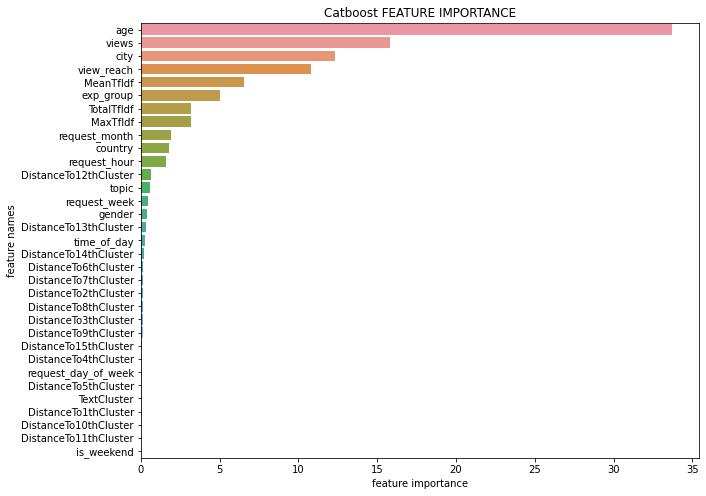

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('feature importance')
    plt.ylabel('feature names')
    
plot_feature_importance(catboost4.feature_importances_,X_train.columns,'Catboost ')

In [43]:
from catboost import CatBoostClassifier
auc_model = CatBoostClassifier().load_model('catboost_auc_model.cbm', format='cbm')

In [75]:
auc_model.predict_proba(X_test)

array([[0.75398533, 0.24601467],
       [0.89899599, 0.10100401],
       [0.65203966, 0.34796034],
       ...,
       [0.78908363, 0.21091637],
       [0.97010121, 0.02989879],
       [0.933909  , 0.066091  ]])